# Section 3.6 — Statistical design and error analysis

This notebook contains the code examples from [Section 3.6 Statistical design and error analysis]() of the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot helper functions
from ministats import plot_pdf
from ministats.utils import savefigure

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
# RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/design"

<Figure size 640x480 with 0 Axes>

In [4]:
# simple float __repr__
np.set_printoptions(legacy='1.25')

# set random seed for repeatability
np.random.seed(42)

## Definitions

Design params: n = 9 , alpha = 0.05 , beta = 0.9106637458903489 , Delta = 0.2 , d = 0.1 , CV = 1.0965690846343146
Saved figure to figures/stats/design/H0_rejection_region.pdf
Saved figure to figures/stats/design/H0_rejection_region.png


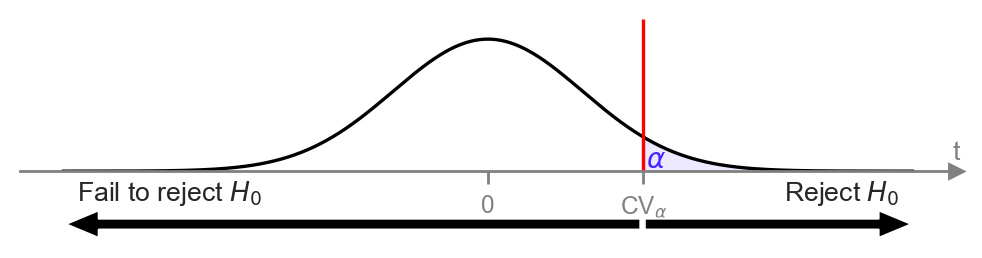

In [5]:
# FIGURES ONLY
from ministats import plot_alpha_beta_errors
with sns.axes_style("ticks"), plt.rc_context({"figure.figsize":(5,1.5)}):
    ax = plot_alpha_beta_errors(cohend=0.1, ax=None, xlims=[-3,3], n=9,
                                show_alt=False, show_concl=True,
                                alpha_offset=(0,0.014),
                                fontsize=10)
    filename = os.path.join(DESTDIR, "H0_rejection_region.pdf")
    savefigure(ax, filename)

Design params: n = 9 , alpha = 0.05 , beta = 0.22508058066585585 , Delta = 1.6 , d = 0.8 , CV = 1.0965690846343146
Saved figure to figures/stats/design/H0_HA_distributions_cvalue.pdf
Saved figure to figures/stats/design/H0_HA_distributions_cvalue.png


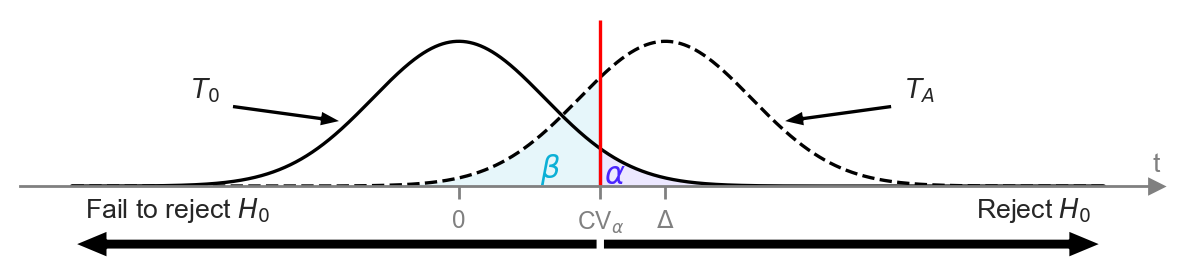

In [6]:
# FIGURES ONLY
from ministats import plot_alpha_beta_errors

with sns.axes_style("ticks"), plt.rc_context({"figure.figsize":(6,1.6)}):
    ax = plot_alpha_beta_errors(cohend=0.8, show_dist_labels=True, show_concl=True,
                                fontsize=11,
                                alpha_offset=(0,0.013),
                                beta_offset=(-0.06,0.02))

filename = os.path.join(DESTDIR, "H0_HA_distributions_cvalue.pdf")
savefigure(ax, filename)

## Hypothesis decision rules

### Decision rule based on $p$-values

```Python
# pre-data
alpha = ...   # chosen in advance

# post-data
obst = ...    # calculated from sample
rvT0 = ...    # sampling distribution under H0
pvalue = ...  # prob. of obst under rvT0

# make decision based on p-value
if pvalue <= alpha:
    decision = "Reject H0"
else:
    decision = "Fail to reject H0"
```

### Simplified decision rule


```Python
# pre-data
alpha = ...     # chosen in advance
rvT0 = ...      # sampling distribution under H0
CV_alpha = ...  # calculated from alpha-quantile of rvT0

# post-data
obst = ...      # calculated from sample
# make decision based on test statistic
if obst >= CV_alpha:
    decision = "Reject H0"
else:
    decision = "Fail to reject H0"
```

## Statistical design

Design params: n = 15 , alpha = 0.05 , beta = 0.8079200023112518 , Delta = 0.4 , d = 0.2 , CV = 0.8493987605509223
Design params: n = 15 , alpha = 0.05 , beta = 0.2868036281956132 , Delta = 1.14 , d = 0.57 , CV = 0.8493987605509223
Design params: n = 15 , alpha = 0.05 , beta = 0.07303790512845218 , Delta = 1.6 , d = 0.8 , CV = 0.8493987605509223
Design params: n = 15 , alpha = 0.05 , beta = 0.0003494316033385531 , Delta = 2.6 , d = 1.3 , CV = 0.8493987605509223
Saved figure to figures/stats/design/panel_beta_for_different_effect_sizes.pdf
Saved figure to figures/stats/design/panel_beta_for_different_effect_sizes.png


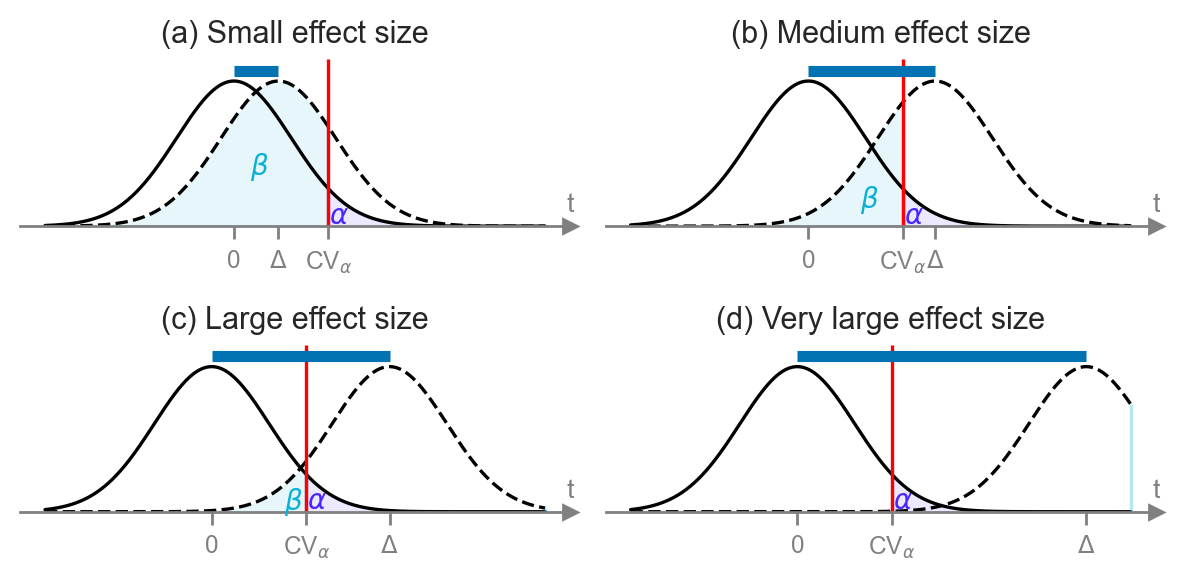

In [7]:
# FIGURES ONLY
d_small = 0.20
d_medium = 0.57 # chosen to avoid overlap between CV and Delta
d_large = 0.80
d_vlarge = 1.3

with sns.axes_style("ticks"):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(6,3))
    
    plot_alpha_beta_errors(cohend=d_small,  xlims=[-1.7,2.8], n=15, ax=ax1, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(0.1,0.2))
    ax1.set_title("(a) Small effect size", fontsize=11)
    
    plot_alpha_beta_errors(cohend=d_medium, xlims=[-1.6,2.9], n=15, ax=ax2, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(0.05,0.08))
    ax2.set_title("(b) Medium effect size", fontsize=11)
    
    plot_alpha_beta_errors(cohend=d_large,  xlims=[-1.5,3], n=15, ax=ax3, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(0,0.02))
    ax3.set_title("(c) Large effect size", fontsize=11)
    
    plot_alpha_beta_errors(cohend=d_vlarge,  xlims=[-1.5,3], n=15, ax=ax4, fontsize=10, show_es=True,
                           alpha_offset=(-0.03,0.005), beta_offset=(-0.06,0.02))
    ax4.set_title("(d) Very large effect size", fontsize=11)

    filename = os.path.join(DESTDIR, "panel_beta_for_different_effect_sizes.pdf")
    savefigure(fig, filename)

Design params: n = 15 , alpha = 0.05 , beta = 0.2485890864965961 , Delta = 1.2 , d = 0.6 , CV = 0.8493987605509223
Design params: n = 30 , alpha = 0.05 , beta = 0.05034872950555784 , Delta = 1.2 , d = 0.6 , CV = 0.6006156235170057
Saved figure to figures/stats/design/panel_beta_for_different_sample_sizes.pdf
Saved figure to figures/stats/design/panel_beta_for_different_sample_sizes.png


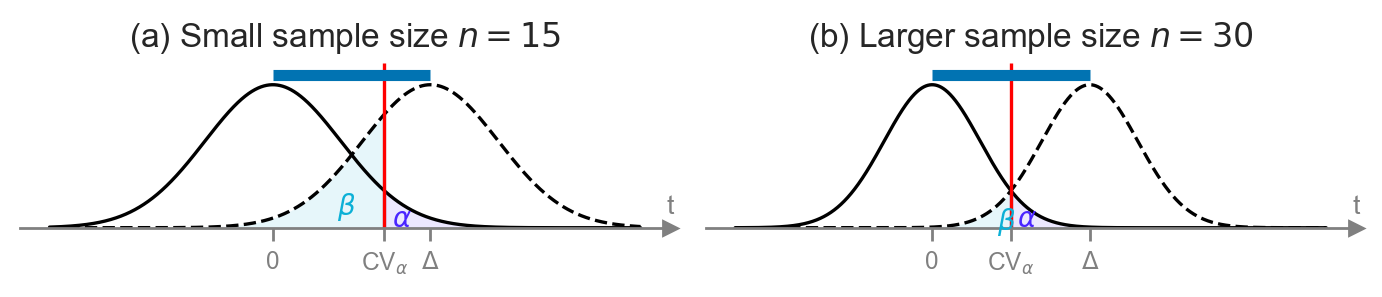

In [8]:
# FIGURES ONLY
Delta = 0.6

# TODO: check this figure --> results for n=15 seem to be too good to be true...
with sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,1.6))
    
    n1 = 15
    plot_alpha_beta_errors(cohend=Delta,  xlims=[-1.7,2.8], n=n1, ax=ax1, fontsize=10, show_es=True,
                           alpha_offset=(0.03,0.005), beta_offset=(0,0.05))
    ax1.set_title(f"(a) Small sample size $n={n1}$", fontsize=12)
    
    n2 = 30
    plot_alpha_beta_errors(cohend=Delta,  xlims=[-1.5,3], n=n2, ax=ax2, fontsize=10, show_es=True,
                           alpha_offset=(0.005,0), beta_offset=(0.04,0.01))
    ax2.set_title(f"(b) Larger sample size $n={n2}$", fontsize=12)

    filename = os.path.join(DESTDIR, "panel_beta_for_different_sample_sizes.pdf")
    savefigure(fig, filename)

Design params: n = 15 , alpha = 0.05 , beta = 0.2485890864965961 , Delta = 1.2 , d = 0.6 , CV = 0.8493987605509223
Design params: n = 15 , alpha = 0.1 , beta = 0.14865057213685162 , Delta = 1.2 , d = 0.6 , CV = 0.6617903827547039
Saved figure to figures/stats/design/panel_beta_for_different_alphas.pdf
Saved figure to figures/stats/design/panel_beta_for_different_alphas.png


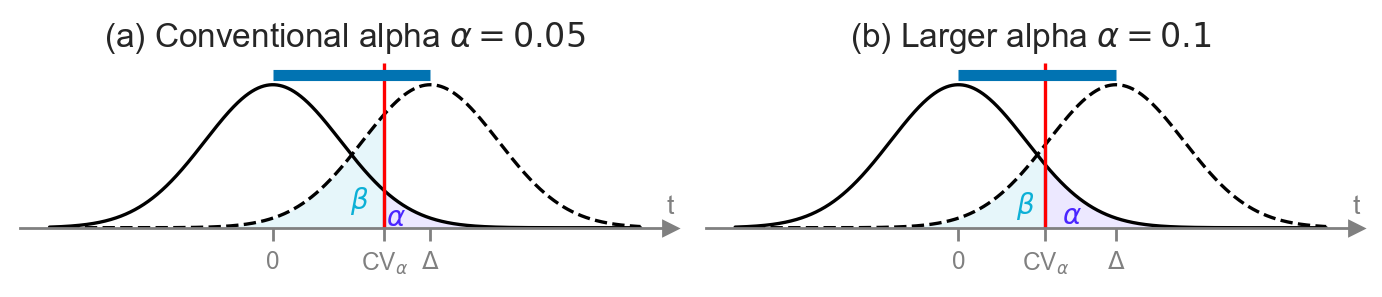

In [9]:
# FIGURES ONLY
Delta = 0.6

with sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,1.6))
    
    n1 = 15
    alpha1 = 0.05
    plot_alpha_beta_errors(alpha=alpha1, cohend=Delta, xlims=[-1.7,2.8], n=15, ax=ax1, fontsize=10, show_es=True,
                           alpha_offset=(-0.02,0.005), beta_offset=(0.1,0.1))
    ax1.set_title(r"(a) Conventional alpha $\alpha=0.05$", fontsize=12)

    alpha2 = 0.1
    plot_alpha_beta_errors(alpha=alpha2, cohend=Delta, xlims=[-1.7,2.8], n=15, ax=ax2, fontsize=10, show_es=True,
                           alpha_offset=(0,0.005), beta_offset=(0.05,0.05))
    ax2.set_title(r"(b) Larger alpha $\alpha=0.1$", fontsize=12)

    filename = os.path.join(DESTDIR, "panel_beta_for_different_alphas.pdf")
    savefigure(fig, filename)

### Cohen's d standardized effect size

The effect size $\Delta$ we use in statistical design is usually expressed as a standardized effect size
like Cohen's $d$, which is defined as the observed "difference" divided by a standard deviation
of the theoretical model under the null hypothesis.


#### One-sample case

For a one-sample test of the mean relative to a null model with mean $\mu_0$,
Cohen's $d$ is calculated as:

$$
  d = \frac{\overline{\mathbf{x}} - \mu_0}{ s_{\mathbf{x}} },
$$

where $s_{\mathbf{x}}$ is the sample standard deviation.

When doing statistical design,
we haven't obtained the sample $\mathbf{x}$ yet so we don't know what its standard deviation $s_{\mathbf{x}}$ will be,
so we have to make an educated guess of this value,
which usually means using the standard deviation of the theoretical model $\sigma_{X_0}$.


#### Two-sample case

For a two-sample test for the difference between means, Cohen's $d$ is defined as the difference between sample means divided by the pooled standard deviation:

$$
  d = \frac{\overline{\mathbf{x}} - \overline{\mathbf{y}} }{ s_{p} }.
$$

where the formula for the pooled variance is
$s_{p}^2 = [(n -1)s_{\mathbf{x}}^2 + (m -1)s_{\mathbf{y}}^2]/(n + m -2)$.

When doing statistical design,
we don't know the standard deviations $s_{\mathbf{x}}$ and $s_{\mathbf{y}}$
so we replace them with the theoretical standard deviations $\sigma_{X_0}$ and $\sigma_{Y_0}$ under the null hypothesis.

Recall [table of reference values](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d) for Cohen's $d$ standardized effect sizes, suggested by Cohen in (Cohen YYYY TODO).

| Cohen's d   | Effect size |
| ----------- | ----------- |
| 0.01        | very small  |
| 0.20        | small       |
| 0.50        | medium      |
| 0.80        | large       |


The formulas for sample size planning and power calculations
we'll present below are based on Cohen's $d$.

This means you'll have to express your guess about the effect size $\Delta$
as $d = \frac{\Delta}{\sigma_0}$ where $\sigma_0$ is your best about the standard deviation
of the theoretical distribution.

Note Cohen's $d$ is based on the standard deviations of the "raw" theoretical population,
and not standard error.

## Example 1: detect kombuncha volume deviation from theory

Design Type A: choose $\alpha=0.05$, $\beta=0.2$, $\Delta_{\textrm{min}} = 4\;\text{ml}$ then calculate required sample size $n$.
We'll assume $\sigma=10$.

In [10]:
alpha = 0.05
beta = 0.2
Delta_min = 4

# assumption
sigma = 10

In [11]:
from scipy.stats import norm
rvZ = norm(loc=0, scale=1)

z_u = rvZ.ppf(1-alpha)
z_l = rvZ.ppf(beta)

n_approx = (z_u - z_l)**2 * sigma**2 / Delta_min**2
n_approx

38.64098270012354

### Using `statsmodels`

To use the `statsmodels` sample size estimation function,
we'll need to express the effect size $\Delta=4$ in terms of Cohen's $d$.

In [12]:
d = Delta_min / sigma
d

0.4

In [13]:
from statsmodels.stats.power import TTestPower
ttp = TTestPower()
n = ttp.solve_power(effect_size=d, alpha=0.05, power=0.8,
                    alternative="larger")
n

40.02907613995643

In [14]:
from scipy.stats import t as tdist

rvT0 = tdist(df=n-1)
CV_alpha = rvT0.ppf(0.95)
CV_alpha

1.6848445860460983

Saved figure to figures/stats/design/plot_one_sample_t_power_vs_sample_size.pdf
Saved figure to figures/stats/design/plot_one_sample_t_power_vs_sample_size.png


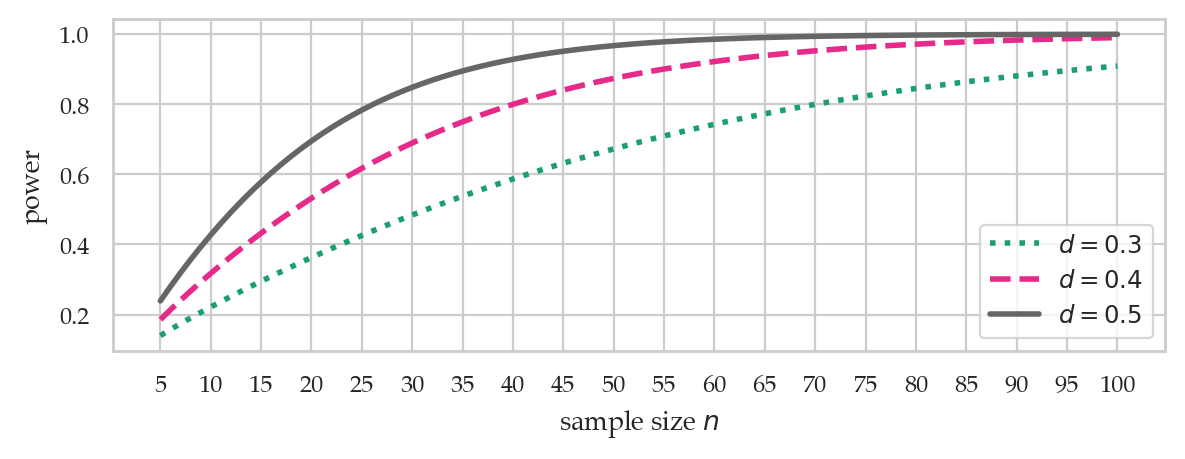

In [15]:
ds = np.array([0.3, 0.4, 0.5])
ns = np.arange(5, 101)
fig, ax = plt.subplots(figsize=(6,2.4))
ttp.plot_power(dep_var="nobs", ax=ax,
               effect_size=ds, nobs=ns, alpha=0.05,
               alternative="larger")
ax.set_xticks( np.arange(5,105,5) )
# ax.set_title("Power of t-test vs. sample size for different effect sizes")
ax.set_title(None)
ax.set_xlabel("sample size $n$")
ax.set_ylabel("power")
# set custom line styles
linestyles = ["dotted", "dashed", "solid"]
for line, ls in zip(ax.get_lines(), linestyles):
    line.set_linestyle(ls)
# set custom legend
labels = [f"$d={d}$" for d in ds]
ax.legend(ax.get_lines(), labels, loc="lower right")

# FIGURES ONLY
filename = os.path.join(DESTDIR, "plot_one_sample_t_power_vs_sample_size.pdf")
savefigure(fig, filename)

Saved figure to figures/stats/design/plot_one_sample_t_power_vs_effect_size.pdf
Saved figure to figures/stats/design/plot_one_sample_t_power_vs_effect_size.png


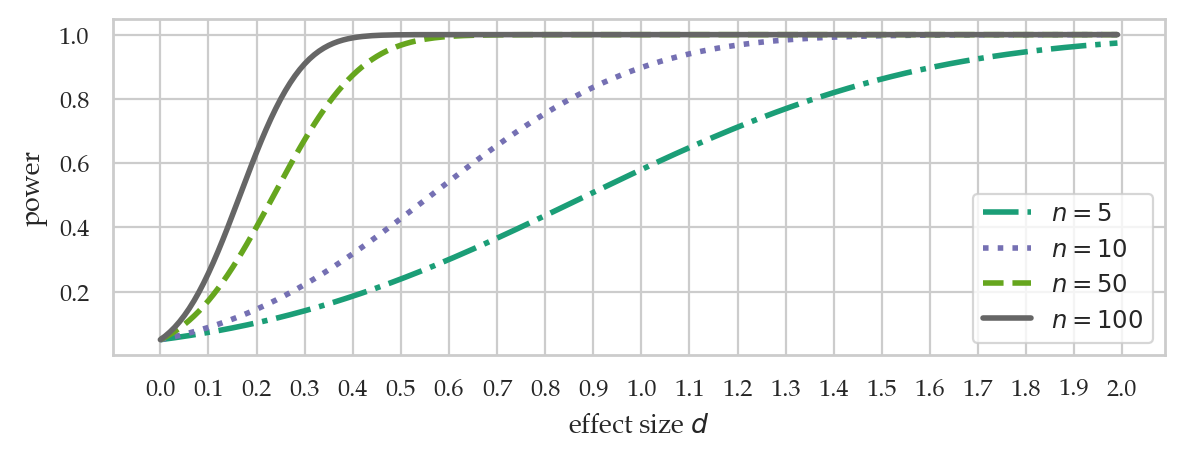

In [16]:
ds = np.arange(0, 2, 0.01)
ns = np.array([5, 10, 50, 100])
fig, ax = plt.subplots(figsize=(6,2.4))
ttp.plot_power(dep_var="effect size", ax=ax,
               effect_size=ds, nobs=ns, alpha=0.05,
               alternative="larger")
ax.set_xticks( np.arange(0, 2+0.1, 0.1) )
# ax.set_title("Power of t-test vs. effect size for different sample sizes")
ax.set_title(None)
ax.set_xlabel("effect size $d$")
ax.set_ylabel("power")

# set custom line styles
linestyles = ["dashdot", "dotted", "dashed", "solid"]
for line, ls in zip(ax.get_lines(), linestyles):
    line.set_linestyle(ls)
# set custom legend
labels = [f"$n={n}$" for n in ns]
ax.legend(ax.get_lines(), labels)

# FIGURES ONLY
filename = os.path.join(DESTDIR, "plot_one_sample_t_power_vs_effect_size.pdf")
savefigure(fig, filename)

### Data collection

In [17]:
kombuchapop = pd.read_csv("../datasets/kombuchapop.csv")
batch55pop = kombuchapop[kombuchapop["batch"]==55]
kpop55 = batch55pop["volume"]

We can select a random sample of size $n=41$ from the populaiton `kpop55`
by calling the `.sample` method.

In [18]:
np.random.seed(52)
n = 41  # rounding up
ksample55 = kpop55.sample(n)
len(ksample55)

41

In [19]:
# Uncomment to see the observed sample
# ksample55.values

In [20]:
# Observed sample mean
np.mean(ksample55)

1002.300975609756

In [21]:
# Observed effect size from Batch 55
Delta_hat = np.mean(ksample55) - 1000
Delta_hat

2.300975609756051

### Statistical analysis on the sample from Batch 55

In [22]:
CV_alpha  # = tdist(df=n-1).ppf(0.95)

1.6848445860460983

In [23]:
kbar55 = ksample55.mean()
sehat55 =  ksample55.std() / np.sqrt(n)

t55 = (kbar55 - 1000) / sehat55
t55

1.643970432409751

We can now apply the simplified decision rule
that compares the test statistic `t55`
to the cutoff value `CV_alpha`.

In [24]:
if t55 >= CV_alpha:
    decision = "Reject H0"
else:
    decision = "Fail to reject H0"
decision

'Fail to reject H0'

Alternatively,
we can make the decision whether to reject $H_0$ or not
using the "old" decision rule that compares the
$p$-value to the cutoff $\alpha=0.05$.
We can compute the p-value from `ttest_mean` function we defined
in Section 3.4, see [34_analytical_approx.ipynb](./34_analytical_approx.ipynb).


In [25]:
from ministats import ttest_mean
pvalue55 = ttest_mean(ksample55, mu0=1000)
if pvalue55 <= 0.05:
    decision = "Reject H0"
else:
    decision = "Fail to reject H0"
decision

'Fail to reject H0'

In [26]:
# # ALT2. Use the p-value form a direct simulation test
# from ministats import simulation_test_mean
# simulation_test_mean(ksample55, mu0=1000, sigma0=10)

## Example 2: comparison of East vs. West electricity prices 

In [27]:
eprices = pd.read_csv("../datasets/eprices.csv")
eprices.groupby("loc").describe()

price                                               
     count      mean       std  min  25%  50%   75%   max
loc                                                      
East   9.0  6.155556  0.877655  4.8  5.5  6.3   6.5   7.7
West   9.0  9.155556  1.562139  6.8  8.3  8.6  10.0  11.8

Need a guess the effect size,
which we'll express in terms of Cohen's $d$.
We choose $d=1$,
which corresponds to a difference of one cent $\Delta_{\text{min}} = 1$,
assuming the standard deviation of the prices is around $\sigma=1$.

In [28]:
cohend2_min = 1

#### Solving for a desired power

The function `solve_power` takes as argument the chosen level of `power`,
and two of the three other design parameters `alpha`, `nobs1`, and `effect_size`,
and calculates the value of the third parameter required to achieve the chosen level of `power` $=(1-\beta)$.

In [29]:
from statsmodels.stats.power import TTestIndPower
ttindp = TTestIndPower()

# power of two-sample t-test assuming cohend2_min and n=m=9 
ttindp.power(effect_size=cohend2_min, nobs1=9, 
             alpha=0.05, alternative="two-sided")

0.5133625331068463

The Type II error rate $\beta$ of this test is 

In [30]:
1 - 0.5133625331068463

0.4866374668931537

Saved figure to figures/stats/design/plot_two_sample_t_power_vs_sample_size.pdf
Saved figure to figures/stats/design/plot_two_sample_t_power_vs_sample_size.png


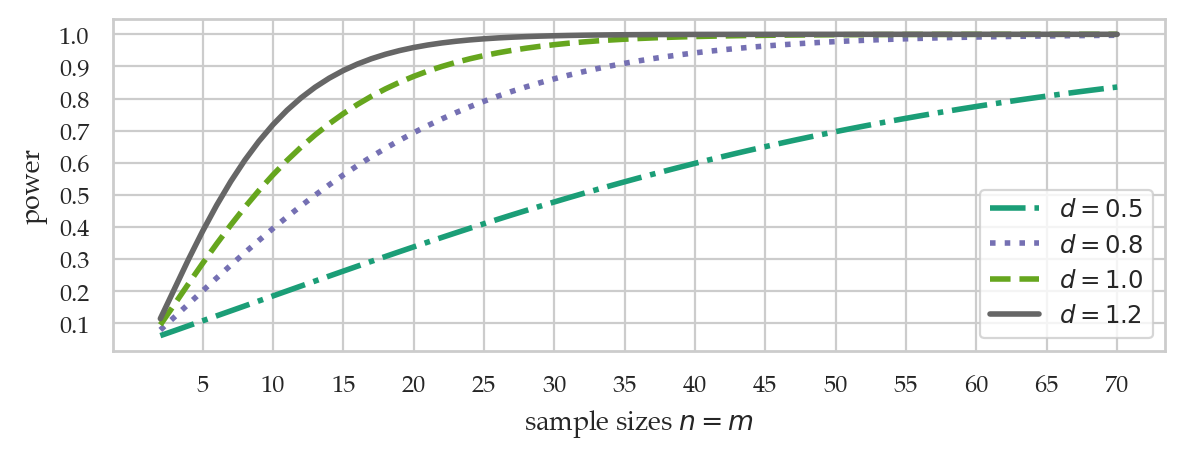

In [31]:
ds = np.array([0.5, 0.8, 1.0, 1.2])
ns = np.arange(2, 71)
fig, ax = plt.subplots(figsize=(6,2.4))
ttindp.plot_power(dep_var="nobs", ax=ax,
                  effect_size=ds, nobs=ns, alpha=0.05,
                  alternative="two-sided")
ax.set_xticks( np.arange(5,75,5) )
# ax.set_title("Power of two-sample t-test vs. sample size $n=m$ for different effect sizes")
ax.set_title(None)
ax.set_xlabel("sample sizes $n=m$")
ax.set_yticks([0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_ylabel("power")

# set custom line styles
linestyles = ["dashdot", "dotted", "dashed", "solid"]
for line, ls in zip(ax.get_lines(), linestyles):
    line.set_linestyle(ls)
# set custom legend
labels = [f"$d={d}$" for d in ds]
ax.legend(ax.get_lines(), labels)

filename = os.path.join(DESTDIR, "plot_two_sample_t_power_vs_sample_size.pdf")
savefigure(fig, filename)

If Bob wants to achieve 80\% power for future price comparison tests,
he needs to collect samples of size $n=1$ or larger.

In [32]:
ttindp.solve_power(effect_size=cohend2_min, power=0.8, alpha=0.05,
                   alternative="two-sided")

16.714722446954013

#### Calculate minimum effect size

In [33]:
# minimum effect size to achieve 80% power when n=m=9
ttindp.solve_power(alpha=0.05, power=0.8, nobs1=9,
                   alternative="two-sided")

1.4069246526802537

#### (optional) Calculate sample size needed to achieve 0.8 power

In [34]:
# minimum sample size required to achieve 80% power when effect size is d=1
ttindp.solve_power(effect_size=1.0, alpha=0.05, power=0.8,
                   alternative="two-sided")

16.714722446954013

## Alternative calculation methods

### Using G*Power

TODO: add sceenshots

### Using `pingouin`

In [35]:
import pingouin as pg

#### Sample size for the one-sample $t$-test

In [36]:
pg.power_ttest(alpha=0.05, power=0.8, d=0.4,
               contrast="one-sample", alternative="greater")

40.02907622585537

We can also verify that $n=41$ produces a test with $80\%$ power.

In [37]:
pg.power_ttest(alpha=0.05, n=41, d=0.4,
               contrast="one-sample", alternative="greater")

0.8085822361693652

#### Power of Bob's two-sample $t$-test

In [38]:
# power of two-sample t-test assuming d=1 and n=m=9 
pg.power_ttest(alpha=0.05, n=9, d=1,
               contrast="two-samples", alternative="two-sided")

0.5133625331068463

## Explanations

### One-sided and two-sided rejection regions

In [39]:
from scipy.stats import t as tdist
rvT0 = tdist(df=9)

alpha = 0.05

# right-tailed rejection region
rvT0.ppf(alpha)

-1.8331129326536337

In [40]:
# left-tailed rejection region
rvT0.ppf(1-alpha)

1.8331129326536333

In [41]:
# two-sided rejection region
rvT0.ppf(alpha/2), rvT0.ppf(1 - alpha/2)

(-2.2621571628540997, 2.262157162854099)

Saved figure to figures/stats/design/panel_rejection_regions_left_twotailed_right.pdf
Saved figure to figures/stats/design/panel_rejection_regions_left_twotailed_right.png


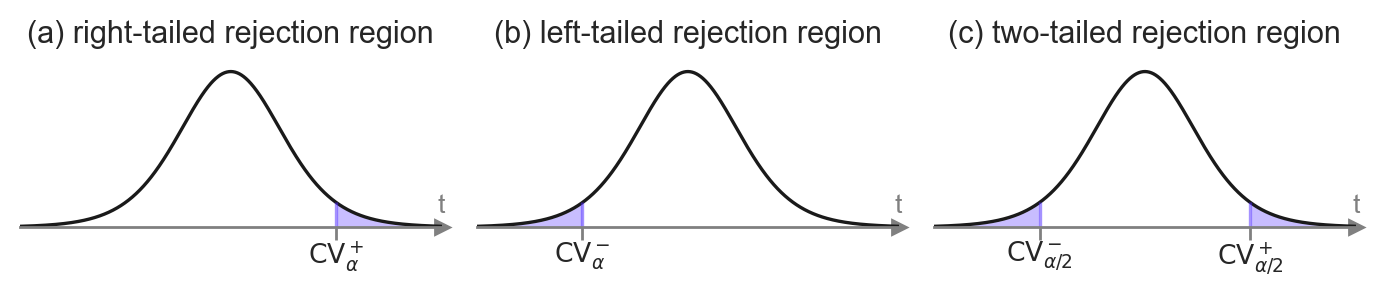

In [42]:
filename = os.path.join(DESTDIR, "panel_rejection_regions_left_twotailed_right.pdf")
    
from scipy.stats import t as tdist
rvT = tdist(df=9)

xs = np.linspace(-4, 4, 1000)
ys = rvT.pdf(xs)

# design choices
transp = 0.3
alpha_color = "#4A25FF"
beta_color = "#0CB0D6"
axis_color = "#808080"

def plot_rejection_region(ax, xs, ys, alt, title):
    ax.set_title(title, fontsize=11)

    # manually add arrowhead to x-axis + label t at the end
    ax.plot(1, 0, ">", color=axis_color, transform=ax.get_yaxis_transform(), clip_on=False)
    ax.set_xlabel("t")
    ax.xaxis.set_label_coords(1, 0.2)

    sns.lineplot(x=xs, y=ys, ax=ax, color="k")
    ax.set_xlim(-4, 4)
    ax.set_ylim(0, 0.42)
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.spines['bottom'].set_color(axis_color)
    ax.tick_params(axis='x', colors=axis_color)
    ax.xaxis.label.set_color(axis_color)
    
    if alt == "greater":
        ax.set_xticks([2])
        # highlight the right tail
        mask = (xs > 2)
        ax.fill_between(xs[mask], y1=ys[mask], alpha=transp, facecolor=alpha_color)
        ax.vlines([2], ymin=0, ymax=rvT.pdf(2), linestyle="-", alpha=transp+0.2, color=alpha_color)
        ax.text(2, -0.03, r"$\mathrm{CV}_{\alpha}^+$", verticalalignment="top", horizontalalignment="center")

    elif alt == "less":
        ax.set_xticks([-2])
        # highlight the left tail
        mask = (xs < -2)
        ax.fill_between(xs[mask], y1=ys[mask], alpha=transp, facecolor=alpha_color)
        ax.vlines([-2], ymin=0, ymax=rvT.pdf(-2), linestyle="-", alpha=transp+0.2, color=alpha_color)
        ax.text(-2, -0.03, r"$\mathrm{CV}_{\alpha}^-$", verticalalignment="top", horizontalalignment="center")

    elif alt == "two-sided":
        ax.set_xticks([-2,2])
        # highlight the left and right tails
        mask = (xs < -2)
        ax.fill_between(xs[mask], y1=ys[mask], alpha=transp, facecolor=alpha_color)
        ax.vlines([-2], ymin=0, ymax=rvT.pdf(-2), linestyle="-", alpha=transp+0.2, color=alpha_color)
        ax.text(-2, -0.03, r"$\mathrm{CV}_{\alpha/2}^-$", verticalalignment="top", horizontalalignment="center")
        mask = (xs > 2)
        ax.fill_between(xs[mask], y1=ys[mask], alpha=transp, facecolor=alpha_color)
        ax.vlines([2], ymin=0, ymax=rvT.pdf(2), linestyle="-", alpha=transp+0.2, color=alpha_color)
        ax.text(2, -0.03, r"$\mathrm{CV}_{\alpha/2}^+$", verticalalignment="top", horizontalalignment="center")


with sns.axes_style("ticks"), plt.rc_context({"figure.figsize":(7,1.6)}):
    fig, (ax3, ax1, ax2) = plt.subplots(1,3)

    # RIGHT
    title = '(a) right-tailed rejection region'
    plot_rejection_region(ax3, xs, ys, "greater", title)

    # LEFT
    title = '(b) left-tailed rejection region'
    plot_rejection_region(ax1, xs, ys, "less", title)

    # TWO-TAILED
    title = '(c) two-tailed rejection region'
    plot_rejection_region(ax2, xs, ys, "two-sided", title)

savefigure(fig, filename)

### Derivation of the sample size planning formula

MAYBE show math steps

## Discussion

### A conceptual amalgam of two ideas


#### Steps of the Neyman—Pearson hypothesis test

1. Calculate the cutoff value $\text{CV}_{\alpha}$.
2. Calculate the test statistic $t_{55}$ from the sample $\mathbf{k}_{55}$.
3. Apply the simplified decision rule that compares the test statistic to the cutoff value.

In [43]:
# 1. Calculate the critical value
from scipy.stats import t as tdist
rvT0 = tdist(df=n-1)
CV_alpha = rvT0.ppf(0.95)
CV_alpha

1.6838510133356523

In [44]:
# 2. Calculate the test statistic
n = len(ksample55)
kbar55 = ksample55.mean()
sehat55 =  ksample55.std() / np.sqrt(n)
t55 = (kbar55 - 1000) / sehat55
t55

1.643970432409751

In [45]:
# 3. Compare the test-statistic to the critical value
if t55 >= CV_alpha:
    decision = "Reject H0"
else:
    decision = "Fail to reject H0"
decision

'Fail to reject H0'

#### Steps of the Fisherian hypothesis test

1. Calculate the test statistic $t_{55}$.
2. Calculate the $p$-value of the statistic from the sampling distribution under $H_0$.
3. Make a decision whether to reject $H_0$ by comparing the $p$-value to the cutoff $\alpha=0.05$.

In [46]:
# 1. Calculate the test statistic
n = len(ksample55)
kbar55 = ksample55.mean()
sehat55 =  ksample55.std() / np.sqrt(n)
t55 = (kbar55 - 1000) / sehat55
t55

1.643970432409751

In [47]:
# 2. Calculate the $p$-value
from scipy.stats import t as tdist
rvT0 = tdist(df=n-1)
pvalue55 = 1 - rvT0.cdf(t55)   # right-tailed p-value
pvalue55

0.054010269315395765

By the way,
we can also obtain the $p$-value
by calling the helper function `ttest_mean`
that we defined in Section 3.4, see [34_analytical_approx.ipynb](./34_analytical_approx.ipynb).

In [48]:
from ministats import ttest_mean
ttest_mean(ksample55, mu0=1000, alt="greater")

0.054010269315395765

In [49]:
# 3. Compare the p-value to the cutoff alpha
if pvalue55 <= 0.05:
    decision = "Reject H0"
else:
    decision = "Fail to reject H0"
decision

'Fail to reject H0'

We see the results of the Neyman–Pearson and Fisherian decision rules are the same.
Indeed,
we'll always come to the same decision,
whether we use criterion $p < \alpha$ in the space of $p$-values,
or the $t_{55} \geq \text{CV}_{\alpha}$ in the space of $t$-values.

### Post-hoc power analysis

In [50]:
# Observed effect size from Batch 55
Delta_hat = np.mean(ksample55) - 1000
Delta_hat

2.300975609756051

In [51]:
# Observed effect size as Cohen's d
d_hat = Delta_hat / 10
d_hat

0.23009756097560513

The *post-hoc power* for the test we performed in Example~1 is:

In [52]:
from statsmodels.stats.power import TTestPower
ttp = TTestPower()
ttp.power(alpha=0.05, nobs=41, effect_size=d_hat, alternative="larger")

0.4221204906778597

It's not clear what this power means...

### Unique value proposition of hypothesis testing

## Exercises

### Exercise {exercise:sensitivity-of-one-sample-t-test-n-10}

In [53]:
from statsmodels.stats.power import TTestPower
ttp = TTestPower()
ttp.solve_power(alpha=0.05, power=0.8, nobs=10, alternative="larger")

0.8528391375721194

### Exercise {exercise:power-of-two-sample-t-test-n-17}

In [54]:
from statsmodels.stats.power import TTestIndPower
ttindp = TTestIndPower()
ttindp.power(alpha=0.05, nobs1=17, effect_size=1, alternative="two-sided")

0.8070367151472199

## Links